In [47]:
import pandas as pd
import pickle 
import numpy as np
import datetime as dt

from keras.models import load_model
model = load_model('kerasModel')
# model = pickle.load(open('FinalModel.pkl', 'rb'))
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense

### Read the dataFile 
Read = pickle.load( open( "uke_eggedal_data_challenge.pkl", "rb" ) )

#save data on my variable
data  = {}
for ids,sets in Read.items():
    data[ids] = sets

#Check keys and data types in the  dic
for ids,sets in data.items():
    print(ids, f', Dtype = {type(sets)}, Total values in Set:{len(sets)}')
    
#Separate the obs_tas and obs_pr arrays into individual columns to make things easier to see
Temp = {}
precipitation ={}

#create dummy data for dictionary depending on lenght of values 
for i in data['obs_pr']:
    Length = len(i)
    for j in range (Length):
        precipitation[f'Prec_Zone_{j}'] = []
#Fill the empty list with the corresponding data 
index = 0
for ids,val in precipitation.items():
    for i in data['obs_pr']:
        precipitation[ids].insert(index,i[index])
    index = index+1    
dfprecipitation = pd.DataFrame(precipitation)

# Repeat for Temperature

#create dummy data for dictionary depending on lenght of values 
for i in data['obs_tas']:
    Length = len(i)
    for j in range (Length):
        Temp[f'Temp_Zone_{j}'] = []
#Fill the empty list with the corresponding data 
index = 0
for ids,val in Temp.items():
    for i in data['obs_tas']:
        Temp[ids].insert(index,i[index])
    index = index+1  
dfTemp = pd.DataFrame(Temp)
#add the date to each DF 
dfTemp['Date'] = data['obs_dates'].reset_index(drop=True) # Reset Index to keep same index as initial DF
dfTemp['Date'] = pd.to_datetime(dfTemp['Date'])
dfprecipitation['Date'] = data['obs_dates'].reset_index(drop=True) # Reset Index to keep same index as initial DF
dfprecipitation['Date'] = pd.to_datetime(dfprecipitation['Date'])
# Create new DataFrame for all data together
DfTemp_Prec = dfprecipitation.merge(dfTemp, how='inner', on='Date')

#Create DataFrame for de Flow data
dfFlow = pd.DataFrame(data['flow'],columns = ['Flow'])
dfFlow['Date'] = data['flow_dates'].reset_index(drop=True)
#Now we merge the two datasets where the dates are the same 
Df_Final= DfTemp_Prec.merge(dfFlow, how='inner', on='Date')
#Df_Final['Flow'] = Df_Final['Flow'].shift(-4)
#Df_Final = Df_Final[:-4]

flow , Dtype = <class 'numpy.ndarray'>, Total values in Set:21542
obs_tas , Dtype = <class 'numpy.ndarray'>, Total values in Set:21546
flow_dates , Dtype = <class 'pandas.core.series.Series'>, Total values in Set:21542
obs_lon_lat , Dtype = <class 'list'>, Total values in Set:2
obs_pr , Dtype = <class 'numpy.ndarray'>, Total values in Set:21546
obs_dates , Dtype = <class 'pandas.core.series.Series'>, Total values in Set:21546


In [48]:
#FinalTest = Df_Final[(Df_Final['Date'] >= f'2015-01-02')]
Original= DfTemp_Prec.merge(dfFlow, how='inner', on='Date')
Original = Original[(Original['Date'] >= f'2015-01-02')]

In [49]:
XFinal = pd.DataFrame(columns=['Flow'])
XFinal['Flow'] = Original['Flow'][:20]

In [58]:
type(XFinal['Flow'][20814])

numpy.float64

In [5]:
# demonstrate prediction
n_steps = 20
n_features = 1
x_input = np.array(XFinal['Flow'])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1.4755273]]


In [13]:
def create_dataset(dataset, look_back=20):
	dataX= []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	return np.array(dataX)

In [16]:
dataset = pd.DataFrame(columns=['Flow'])
dataset['Flow'] = Df_Final['Flow']
dataset = dataset.values
dataset = dataset.astype('float32')
X = create_dataset(dataset, look_back=20)

In [19]:
Y = Df_Final['Flow'][21:]

In [26]:
XEnd = []
for i in X:
    n_steps = 20
    n_features = 1
    x_input = np.array(i)
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    XEnd.append(yhat)

In [36]:
XList = []
for i in range(0,len(XEnd),1):
    XList.append(XEnd[i][0][0])

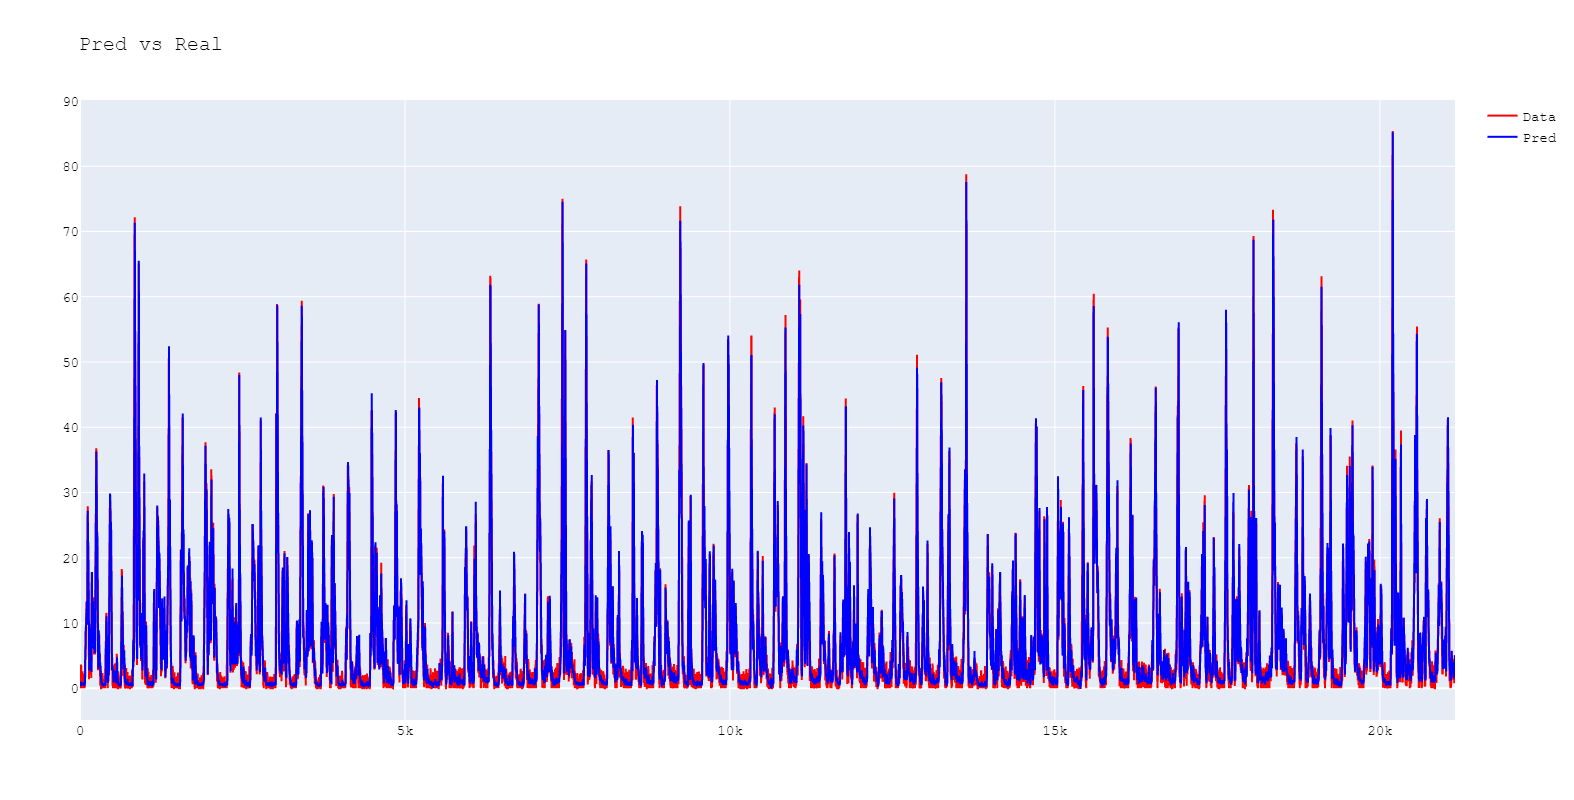

In [38]:
import plotly.offline as pyo
import plotly.graph_objs as go
from IPython.display import display, Markdown, Latex

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=Y,
    name =  f'Data',
    mode = 'lines',
    line = dict(color = 'red'),
    connectgaps=False
    ),
 )

fig.add_trace(go.Scatter(
    y=XList,
    name =  f'Pred',
    mode = 'lines',
    line = dict(color = 'Blue'),
    connectgaps=False
    ),
 )




fig.update_layout(
title=f'Pred vs Real',
font=dict(
family="Courier New, monospace",
size=14,
color="#000000"
))
    
fig.update_layout(height=800, width = 1100)

In [40]:
len(XList)

21157

In [42]:
len(Df_Final)

21178

In [44]:
PredictedValues = pd.DataFrame(XList,columns = ['Predicted'])

In [46]:
PredictedValues.to_csv('PredictedValues.csv',index=False)

In [ ]:
{'Predicted':123123}